<a href="https://colab.research.google.com/github/abhisingh192/mnist-digit-recognition/blob/master/digit_recognition_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt


In [0]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


In [0]:
#importing the inbuilt mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


3


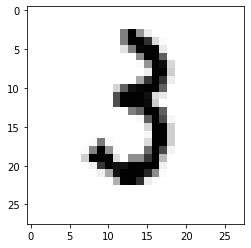

In [20]:
image_index = 1234
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [21]:
x_train.shape

(60000, 28, 28)

In [0]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [23]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
input_shape = (28, 28, 1)


In [0]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [27]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
#creating a sequential keras model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [32]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10




60000/60000 [==============================] - 22s 361us/step - loss: 0.2057 - acc: 0.9375
Epoch 2/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0847 - acc: 0.9739
Epoch 3/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0586 - acc: 0.9818
Epoch 4/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0431 - acc: 0.9860
Epoch 5/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0359 - acc: 0.9877
Epoch 6/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0287 - acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0256 - acc: 0.9912
Epoch 8/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0212 - acc: 0.9929
Epoch 9/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0195 - a

In [33]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 1s 57us/step


[0.05804750192643114, 0.9849]

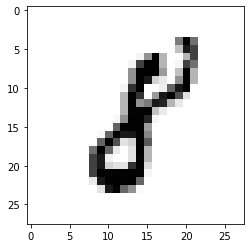

In [37]:
image_index = 3245
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')


In [38]:
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

8
